# QUESTION 2 - ANALYSIS 2

## All Required Imports

In [50]:
import os
import os.path
import glob
import csv
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
#Retrieving the current system path
directory = os.path.dirname(os.getcwd()) 

# Retreiving the required path and assigning it to variable 'reqpath'
reqpath = directory + '/data/NYT_data/archive/*.json'

reqpath

'/Users/sonalichaudhari/Desktop/midterm/data/NYT_data/archive/*.json'

In [68]:
date ={} # Dictionary for storing the date and counts of archive articles published on that day
for f in glob.glob(reqpath):
    with open (f,'r',encoding = 'ISO-8859-1') as json_file:   # Opening each each json file in the reqpath in read mode
        a = json.load(json_file)  # loading the data of file in a
        b = a['pub_date'][:10]  # Retrieving the part of date that is required
        string = b[8:]          # retrieving only the day of the date
        if string not in date:
            date[string] = 1
        else:
            date[string]+=1
        

In [67]:
with open('Archive.csv', 'w') as csvfile:    # Creating a CSV file named 'Archive' in write mode as csvfile
            fieldnames = ['PUBLSIH DATE','NEWS DESK','DOCUMENT TYPE','WORDCOUNT','SOURCE']  #Naming the title Row of the CSV
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            for f in glob.glob(reqpath):
                with open (f,'r',encoding = 'ISO-8859-1') as json_file:
                    a = json.load(json_file)
                    news_desk= a['news_desk']
                    dtype = a['document_type']
                    words = a['word_count']
                    source = a['source']
                    date1 = a['pub_date'][:10]
                    writer.writerow({'PUBLSIH DATE':date1,'NEWS DESK':news_desk,'DOCUMENT TYPE':dtype,'WORDCOUNT':words,'SOURCE':source}) # Adding entry in the CSV

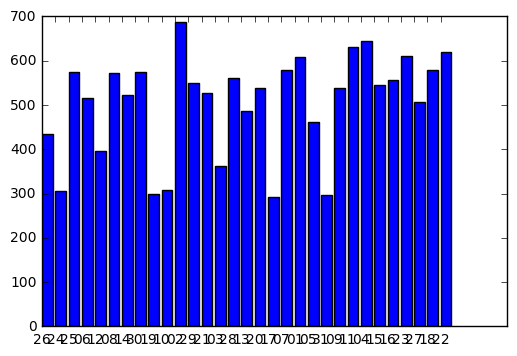

In [46]:
# Generationg the graph for the archive article as per the date of October Month for 2015
plt.bar(range(len(date)), date.values())
plt.xticks(range(len(date)), date.keys())

plt.show()